In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv('Social_Net_class.csv')

In [64]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [65]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [66]:
x.shape,y.shape


((400, 2), (400,))

In [67]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [82]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [83]:
ss.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [84]:
x_train_scaled=ss.transform(x_train)
x_test_scaled=ss.transform(x_test)


In [155]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(max_depth=2)

In [156]:
model_dt.fit(x_train_scaled,y_train)
model_dt.score(x_test_scaled,y_test),model_dt.score(x_train_scaled,y_train)


(0.90625, 0.925)

In [151]:
x.shape,x_train.shape,y_train.shape,y.shape

((400, 2), (240, 2), (240,), (400,))

In [152]:
y_pred=model_dt.predict(x_test_scaled)

In [137]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1])

In [138]:
c0_p=x_test_scaled[y_pred==0]
c1_p=x_test_scaled[y_pred==1]
c0_a=x_test_scaled[y_test==0]
c1_a=x_test_scaled[y_test==1]

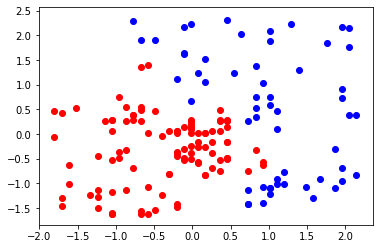

In [139]:
plt.scatter(c0_p[:,0],c0_p[:,1] ,c='red')
plt.scatter(c1_p[:,0],c1_p[:,1] ,c='blue')


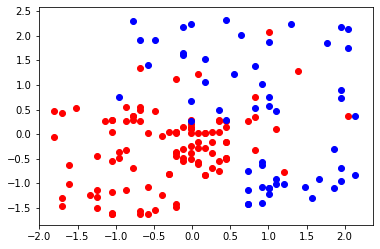

In [140]:
plt.scatter(c0_a[:,0],c0_a[:,1] ,c='red')
plt.scatter(c1_a[:,0],c1_a[:,1] ,c='blue')


In [167]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=5,min_samples_leaf=5,max_depth=5)
model_rf.fit(x_train_scaled,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
model_rf.score(x_train_scaled,y_train),model_rf.score(x_test_scaled,y_test)

(0.925, 0.88125)